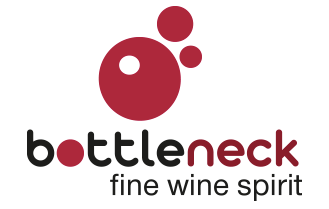

<div>
<p> <h1 style='margin: auto; padding: 20px; color: RGB(173,40,59); text-align: center; '>Optimiser la gestion des données d'une boutique</h1>
<h2 style="margin: auto; padding: 0px ; color: RGB(29,29,27); text-align: center">Inès KHALDI - Data Analyst - OC 2023
</h2> </p>
</div>

---

<div>
<h1 style='padding: 20px; color: RGB(173,40,59); text-align: left; '>Introduction</h1>

Bottleneck souhaite améliorer la gestion de ses ventes de vins en ligne et ainsi mieux les analyser. En attendant de trouver une solution centralisée pour lier l'ERP et le site de vente en ligne, nous allons réaliser un rapprochement entre ces 2 bases.

Nous disposons de 3 fichiers Excel : 
- Le fichier ERP : contient les références produits, les prix de ventes et l'état des stocks
- Le fichier WEB : l'outil de CMS qui contient les informations des produits vendus en ligne (nombre de ventes pas produit)
- Le fichier LIAISON : établit le lien entre la référence du produit du fichier ERP et celle du fichier WEB. 


Pour cela, notre mission se décompose en 4 étapes : 

**1.** Une analyse exploratoire et un nettoyage des données des 3 fichiers disponibles

**2.** La création d'un dataframe global en rapprochant les 3 fichiers  

**3.** Une analyse des ventes 

**4.** Vérification des erreurs de saisie de prix (outliers)


---

# <div>
<h1 style='padding: 20px; color: RGB(173,40,59); text-align: left; '>Sommaire</h1>

* [I. Importation des librairies](#I.-importation-des-librairies)

* [II. Analyse exploratoire et nettoyage des données](#II.-analyse-exploratoire-et-nettoyage-des-donnees)
    * [2.1 Dataframe ERP](#2.1-dataframe-erp)
        * [2.1.1 Analyse exploratoire](#2.1.1-analyse-exploratoire)
        * [2.1.2 Nettoyage des données](#2.1.2-nettoyage-des-donnees)
            * [a. Erreurs de type des variables](#a.-erreurs-de-type-des-variables)
            * [b. Valeurs manquantes](#b.-valeurs-manquantes)
            * [c. Doublons](#c.-doublons) 
            * [d. Détection des outliers](#d.-detection-des-outliers)
        * [2.1.3 Description du df ERP](#2.1.3-description-du-df-erp)
    * [2.2 Dataframe WEB](#2.2-dataframe-web)
        * [2.2.1 Analyse exploratoire](#2.2.1-analyse-exploratoire)
        * [2.2.2 Nettoyage des données](#2.2.2-nettoyage-des-donnees)
            * [a. Erreurs de type des variables](#a.-erreurs-de-type-des-variables)
            * [b. Valeurs manquantes](#b.-valeurs-manquantes)
            * [c. Doublons](#c.-doublons)
            * [d. Détection des outliers](#d.-detection-des-outliers)
        * [2.2.3 Description du df WEB](#2.2.3-description-du-df-web)
    * [2.3 Dataframe LIAISON](#2.3-dataframe-liaison)
        * [2.3.1 Analyse exploratoire](#2.3.1-analyse-exploratoire)
        * [2.3.2 Nettoyage des données](#2.3.2-nettoyage-des-donnees)
            * [a. Erreurs de type des variables](#a.-erreurs-de-type-des-variables)
            * [b. Valeurs manquantes](#b.-valeurs-manquantes)
            * [c. Doublons](#c.-doublons)
            * [d. Changement du nom de la colonne 'id_web'](#d.-changement-du-nom-de-la-colonne-id-web-)
            * [e. Détection des outliers](#e.-detection-des-outliers)
        * [2.3.3 Description du df LIAISON](#2.3.3-description-du-df-liaison)
            
* [III. Création d'un dataframe global](#III.-creation-d-un-dataframe-global)
    * [3.1 Choix des clés primaires et test d'unicité](#3.1-choix-des-cles-primaires-et-test-d-unicite)
    * [3.2 Jointure externe entre les fichiers ERP, LIAISON et WEB](#3.2-jointure-externe-entre-les-fichiers-erp,-liaison-et-web)
        * [3.2.1 Jointure entre les df ERP et LIAISON](#3.2.1-jointure-entre-les-df-erp-et-liaison)
            * [a. Analyse de la jointure](#a.-analyse-de-la-jointure)
        * [3.2.2 Jointure entre les df DF1 et WEB](#3.2.2-jointure-entre-les-df-df1-et-web)
            * [a. Analyse de la jointure](#a.-analyse-de-la-jointure)
        * [3.2.3 Nettoyage du dataframe GLOBAL](#3.2.3-nettoyage-du-dataframe-global)

* [IV. Analyse du dataframe global](#IV.-analyse-du-dataframe-global)
    * [4.1 Analyse du chiffre d'affaires](#4.1-analyse-du-chiffre-d-affaires)
        * [4.1.1 CA par produit](#4.1.1-ca-par-produit)
            * [a. Visualisations](#a.-visualisations)
        * [4.1.2 CA total réalisé en ligne](#4.1.2-ca-total-realise-en-ligne)
    * [4.2 Analyse des erreurs de saisie des prix](#4.2-analyse-des-erreurs-de-saisie-des-prix)
        * [4.2.1 Description du df global](#4.2.1-description-du-df-global)
        * [4.2.2 Les outliers potentiels](#4.2.2-les-outliers-potentiels)
            * [a. Méthode écart interquartile](#a.-methode-ecart-interquartile)
            * [b. Première visualisation graphique des potentiels outliers](#b.-premiere-visualisation-graphique-des-potentiels-outliers)
            * [c. Liste des outliers potentiels](#c.-liste-des-outliers-potentiels)
        * [4.2.3 Représentation graphique](#4.2.3-representation-graphique)
        * [4.2.4 Analyse des outliers](#4.2.4-analyse-des-outliers)
        
* [V. Conclusion](#V.-conclusion)
    
    
    
    
    
    

---

# <div style="border: 1px solid RGB(173,40,59);" >
<h1 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
I.  Importation des librairies <a class='anchor' id='I.-importation-des-librairies'></a> 
</h1>

In [1]:
#Importation des librairies qui vont nous servir 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')


Nous allons analyser les 3 jeux de données suivants : 
- **Fichier ERP** : Informations produits 
- **Fichier LIAISON** : Lien entre l'id du produit du fichier ERP avec la référence du même produit dans le fichier WEB
- **Fichier WEB** : Ventes en ligne des produits 

# <div style="border: 1px solid RGB(173,40,59);" >
<h1 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
II.  Analyse exploratoire et nettoyage des données <a class='anchor' id='II.-analyse-exploratoire-et-nettoyage-des-donnees'></a> </h1>

## 
<h2 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
2.1  Dataframe ERP <a class='anchor' id='2.1-dataframe-erp'></a> </h2>

Chargement du jeu de données du fichier ERP dans le dataframe `df_erp`. 

In [2]:
df_erp = pd.read_excel('fichier_erp.xlsx')

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
2.1.1 Analyse exploratoire <a class='anchor' id='2.1.1-analyse-exploratoire'></a> </h3>

Pour réaliser l'analyse exploratoire des données nous allons réaliser plusieurs étapes :  
- Afficher les premières lignes du df
- Afficher les dimensions du df

In [3]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
df_erp.shape

(825, 5)

La variable **'onsale_web'** indique : 
- les produits vendus en ligne = 1 
- les produits non vendus en ligne = 0. 

Donc il est intéressant d'observer combien de produits sont vendus en ligne et donc par conséquent, combien ne le sont pas. Cette information nous sera utile lorsque nous analyserons le fichier liaison qui relie les produits du fichier ERP et ceux vendus du fichier WEB. 

In [5]:
#Filtre le df uniquement sur les produits vendus en ligne
id_produits_ligne = df_erp[df_erp['onsale_web']==1]

In [6]:
#Affiche les dimensions 
id_produits_ligne.shape

(717, 5)

<div style="border: 1px solid RGB(173,40,59);" 

**DESCRIPTION :** 

Le fichier ERP contient 825 identifiants de produit renseignés sur 5 variables différentes :
- product_id : identifiant du produit
- onsale_web : produit en vente en ligne
- price : prix
- stock_quantity : quantité en stock
- stock_status : statut du stock du produit
     
Également : 
- 717 produits sont vendus en ligne 
- 108 produits ne sont pas vendus en ligne

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
2.1.2 Nettoyage des données <a class='anchor' id='2.1.2-nettoyage-des-donnees'></a> </h3>

####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
a. Erreurs de type des variables <a class='anchor' id='a.-erreurs-de-type-des-variables'></a> </h4>

Nous allons vérifier que les variables ont bien été importées dans le bon type. 

In [7]:
df_erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

Nous pouvons voir que *stock_status* est indiqué en `object`. Cela veut dire que Python n'a pas sû déterminer un type natif pour cette variable. Étant donné qu'elle ne contient que 2 valeurs qui sont des chaînes de caractères : **'outofstock'** ou **'instock'**, nous pouvons changer ce type en `string`. 

In [8]:
df_erp['stock_status'] = df_erp['stock_status'].astype('string')

In [9]:
#Vérification du changement 
df_erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       string
dtype: object

####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
b. Valeurs manquantes <a class='anchor' id='b.-valeurs-manquantes'></a> </h4>

Nous vérifions si le jeu de données contient des valeurs manquantes. 

In [10]:
#Utilisation de la méthode .isnull() qui permet de comptabiliser le nombre de valeurs manquantes par variable. 
df_erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
c. Doublons <a class='anchor' id='c.-doublons'></a> </h4>

À présent, nous observons si certains produits apparaissent en doublons. 
Pour vérifier cela, on se focalise sur des informations qui ne peuvent normalement pas être en double, soit : `['product_id']` (clé primaire). Sur cette variable, on ne doit pas avoir deux produits identiques.

In [11]:
df_erp.loc[df_erp[['product_id']].duplicated(keep=False)]

,product_id,onsale_web,price,stock_quantity,stock_status


####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
d. Détection des outliers <a class='anchor' id='d.-detection-des-outliers'></a> </h4>

In [12]:
df_erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.384000,26.583030
std,902.644635,0.337506,26.832271,45.875948
min,3847.000000,0.000000,-8.000000,-1.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


<div style="border: 1px solid RGB(173,40,59);"
     
**OBSERVATIONS :** 
     
**Price** : 
- Les prix des produits vendus sont compris entre -8 et 225 €.                                                     - le minimum est à -8. Or, nous ne pouvons pas avoir de prix négatif sur un produit. Le prix le plus bas d\'un produit ne peut pas être inférieur à 0. 

**Stock_quantity** : 
- Cette variable qui a un minimum de -1. Le plus bas est qu\'il n\'y est pas de stock, soit 0. 

**Analyse des outliers des références produits 'product_id'**

In [13]:
df_erp[~df_erp['product_id'].astype(str).str.match(r'^\d+$')]

,product_id,onsale_web,price,stock_quantity,stock_status


**Analyse des outliers de prix 'price'**

In [14]:
df_erp[df_erp['price'] <= 0]

,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,0,-8.0,0,outofstock
739,6594,0,-1.0,192,instock


**Analyse des outliers de stock**

In [15]:
#Afficher les produits ayant un stock inférieur à 0 'stock_quantity'
df_erp[df_erp['stock_quantity'] < 0]

,product_id,onsale_web,price,stock_quantity,stock_status
449,4973,0,10.0,-1,outofstock
573,5700,1,44.5,-1,outofstock


In [16]:
#Afficher les produits ayant un stock supérieur à 0 mais indiqué 'outofstock'
df_erp[(df_erp['stock_quantity'] > 0 ) & (df_erp['stock_status'] == 'outofstock')]


,product_id,onsale_web,price,stock_quantity,stock_status
19,4055,0,86.1,1,outofstock
49,4090,0,73.0,6,outofstock
50,4092,0,47.0,6,outofstock
630,5826,1,41.2,12,outofstock
696,6125,0,14.2,48,outofstock


In [17]:
#Afficher les produits ayant un stock inférieur ou égal à 0 mais indiqué 'instock'
df_erp[(df_erp['stock_quantity'] <= 0) & (df_erp['stock_status'] == 'instock')]


,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
2.1.3 Description du df ERP <a class='anchor' id='2.1.3-description-du-df-erp'></a> </h3>

<div style="border: 1px solid RGB(173,40,59);" 

**Fichier ERP :**
- A été corrigé sur le type de la variable 'stock_status'
- N'a pas de valeurs manquantes
- Ne contient pas de doublons
    
Contient plusieurs anomalies : 
- Les produits [5017, 6594] ont des prix négatifs (-8 € et -1 €)
- Les produits [4973, 5700] ont des stocks négatifs (-1)
- Les produits [4055, 4090, 4092, 5826, 6125] sont indiquées ['outofstock'] or ils ont un stock supérieur à 0. 
- Le produit [4954] est indiqué ['instock'] mais n'en contient aucun. 

## 
<h2 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
2.2 Dataframe WEB <a class='anchor' id='2.2-dataframe-web'></a> </h2>

Chargement du jeu de données du fichier WEB dans le dataframe `df_web`. 

In [18]:
df_web = pd.read_excel('fichier_web.xlsx')

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
2.2.1 Analyse exploratoire <a class='anchor' id='2.2.1-analyse-exploratoire'></a> </h3>

- Afficher les premières lignes du df
- Afficher les dimensions du df

In [19]:
#Affiche les premières du df
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [20]:
#Affiche les dimensions du df
df_web.shape

(1513, 28)

In [21]:
#Affiche le nom des colonnes du df
df_web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
2.2.2 Nettoyage des données <a class='anchor' id='2.2.2-nettoyage-des-donnees'></a> </h3>

####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
a. Erreurs de type des variables <a class='anchor' id='a.-erreurs-de-type-des-variables'></a> </h4>

In [22]:
df_web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


Nous pouvons voir que *sku* qui est la référence web des produits est indiqué en `object`. Cela veut dire que Python n'a pas sû déterminer un type natif pour cette variable. Cette colonne doit sûrement contenir des valeurs de type 'string' et 'integer'. 

####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
b. Valeurs manquantes <a class='anchor' id='b.-valeurs-manquantes'></a> </h4>

In [23]:
#Utilisation de la méthode .isnull() qui permet de comptabiliser le nombre de valeurs manquantes par variable. 
df_web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

Lorsque nous avons afficher les premières lignes du df, on a pu remarquer que de nombreuses colonnes contiennent des valeurs = 0. Or, si ces variables en contiennent trop alors cette dernière ne sera pas utile pour notre étude. 

In [24]:
#Afficher le nombre de valeurs = 0
for column in df_web.columns:
    nb_zeros = (df_web[column] == 0).sum()
    print(f"Nombre de zéros dans '{column}': {nb_zeros}")

Nombre de zéros dans 'sku': 0
Nombre de zéros dans 'virtual': 1513
Nombre de zéros dans 'downloadable': 1513
Nombre de zéros dans 'rating_count': 1513
Nombre de zéros dans 'average_rating': 1430
Nombre de zéros dans 'total_sales': 658
Nombre de zéros dans 'tax_status': 0
Nombre de zéros dans 'tax_class': 0
Nombre de zéros dans 'post_author': 0
Nombre de zéros dans 'post_date': 0
Nombre de zéros dans 'post_date_gmt': 0
Nombre de zéros dans 'post_content': 0
Nombre de zéros dans 'post_title': 0
Nombre de zéros dans 'post_excerpt': 0
Nombre de zéros dans 'post_status': 0
Nombre de zéros dans 'comment_status': 0
Nombre de zéros dans 'ping_status': 0
Nombre de zéros dans 'post_password': 0
Nombre de zéros dans 'post_name': 0
Nombre de zéros dans 'post_modified': 0
Nombre de zéros dans 'post_modified_gmt': 0
Nombre de zéros dans 'post_content_filtered': 0
Nombre de zéros dans 'post_parent': 1430
Nombre de zéros dans 'guid': 0
Nombre de zéros dans 'menu_order': 1430
Nombre de zéros dans 'post

<div style="border: 1px solid RGB(173,40,59);"
     
**OBSERVATIONS :** 
     
**- 4 variables sont vides :** 'tax_class', 'post_content', 'post_password', 'post_content_filtered' *-> Aucune information*
    
**- 3 variables ont 797 et 799 valeurs manquantes :** 'tax_status', 'post_excerpt', 'post_mime_type' *-> Oublie de ces variables car beaucoup de valeurs manquantes*
**- 3 variables contiennent uniquement des valeurs égales 0 :** 'virtual', 'downloadable', 'rating_count' 
*-> Aucune information*

**- 4 variables ont une grande partie de leurs valeurs égales à 0 :** 'average_rating', 'post_parent', 'menu_order', 'comment_count' *-> Oublie de ces variables car beaucoup de valeurs égales à 0*

**- 9 variables concerne la publication du produit et non la vente du produit :** 'post_author', 'post_date', 'post_date_gmt', 'post_status', 'comment_status', 'ping_status', 'post_name', 'post_modified', 'post_modified_gmt' *-> N'apporte aucune valeur ajoutée à l'étude

Nous pouvons donc supprimer ces variables. 

In [25]:
#Pour plus de clarté, suppression des 23 variables. 
df_web.drop(columns=['tax_class', 'post_content', 'post_password', 'post_content_filtered', 'tax_status', 'post_excerpt', 'post_mime_type', 'virtual', 'downloadable', 'rating_count', 'average_rating', 'post_parent', 'menu_order', 'comment_count', 'post_author', 'post_date', 'post_date_gmt', 'post_status', 'comment_status', 'ping_status', 'post_name','post_name', 'post_modified', 'post_modified_gmt'], inplace=True) 

In [26]:
#Afficher le nouveau df
df_web

,sku,total_sales,post_title,guid,post_type
0,16004,5.0,Château du Couvent Pomerol 2017,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1,NaN,NaN,NaN,NaN,NaN
2,15075,3.0,Parés Baltà Penedès Indigena 2017,https://www.bottle-neck.fr/?post_type=product&...,product
3,16209,6.0,Maurel Cabardès Tradition 2017,https://www.bottle-neck.fr/?post_type=product&...,product
4,15763,1.0,Domaine de la Monardière Vacqueyras Vieilles V...,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
...,...,...,...,...,...
1508,12881,2.0,Domaine de Montbourgeau L'Etoile Vin Jaune 2009,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1509,15663,3.0,Chermette Domaine du Vissoux Brouilly Pierreux...,https://www.bottle-neck.fr/?post_type=product&...,product
1510,15910,0.0,Thevenet Quintaine Viré-Clessé La Bongran 2015,https://www.bottle-neck.fr/?post_type=product&...,product
1511,38,38.0,Emile Boeckel Crémant Brut Blanc de Blancs,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


Avec ce nouveau df, nous pouvons voir la référence du produit associé à : 
- son nombre de vente 
- son nom
- son lien en ligne
- son type (si c'est le produit en lui-même ou l'image correspondante)

In [27]:
#Afficher le nombre de valeurs manquantes
df_web.isnull().sum()

sku            85
total_sales    83
post_title     83
guid           83
post_type      83
dtype: int64

<div style="border: 1px solid RGB(173,40,59);"
     
**OBSERVATIONS :**
     
Toutes les variables ont 83 valeurs manquantes hormis la varibale 'sku' qui en a 85. Cela veut dire que 2 produits ont leur identifiant qui est manquant alors qu'ils ont bien été vendus. Donc nous allons regarder cela plus en détail et ainsi le corriger il s'agit sûrement d'une erreur.

In [28]:
#Sélection des lignes de la variable 'sku' contenant des valeurs NaN
sku_na = df_web.loc[df_web['sku'].isna(),:]

In [29]:
#Méthode .loc permet de sélectionner que les lignes dont les valeurs sont des NaN
# ~ placé en amont prend l'inverse de la condition (l'ensemble des lignes dont le titre du poste n'est pas manquant)
sku_na = sku_na.loc[~sku_na['post_title'].isna(),:]
pd.set_option('max_colwidth', None)
sku_na

,sku,total_sales,post_title,guid,post_type
353,NaN,3.0,Pierre Jean Villa Condrieu Jardin Suspendu 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=,product
488,NaN,10.0,Pierre Jean Villa Côte Rôtie Fongeant 2017,https://www.bottle-neck.fr/?post_type=product&#038;p=,product


On peut voir que les produits des lignes 353 et 488  ont leur 'sku' manquant alors que les autres variables ne sont pas manquantes. Mais ici, il n'est pas possible de retrouver la référence 'sku' car celle-ci n'est pas indiquée non plus dans la variable 'guid'. 

La variable 'sku' étant importante dans notre analyse, nous ne pouvons pas garder les valeurs manquantes. Nous allons donc nous allons créer un sous-échantillon dans lequel les lignes des valeurs manquantes seront supprimées. 

In [30]:
#Création d'un sous-échantillon
df_ss_web = df_web.loc[df_web['sku'].notna()]

In [31]:
#Afficher les valeurs manquantes sur le sous-échantillon
df_ss_web.isnull().sum()

sku            0
total_sales    0
post_title     0
guid           0
post_type      0
dtype: int64

In [32]:
df_ss_web.shape

(1428, 5)

<div style="border: 1px solid RGB(173,40,59);"
     
**OBSERVATIONS :** 
     
- Il n'y a plus de valeurs manquantes dans le fichier WEB. 

####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
c. Doublons <a class='anchor' id='c.-doublons'></a> </h4>

À présent, nous observons si certains produits apparaissent en doublons. 
Pour vérifier cela, on se focalise sur des informations qui ne peuvent normalement pas être en double, soit : `['sku']` (clé primaire). Sur cette variable, on ne doit pas avoir deux produits identiques.

In [33]:
df_ss_web['sku'].duplicated().sum()

714

In [34]:
df_ss_web

,sku,total_sales,post_title,guid,post_type
0,16004,5.0,Château du Couvent Pomerol 2017,https://www.bottle-neck.fr/wp-content/uploads/2020/03/chateau-du-couvent-pomerol-2017.jpg,attachment
2,15075,3.0,Parés Baltà Penedès Indigena 2017,https://www.bottle-neck.fr/?post_type=product&#038;p=15075,product
3,16209,6.0,Maurel Cabardès Tradition 2017,https://www.bottle-neck.fr/?post_type=product&#038;p=16209,product
4,15763,1.0,Domaine de la Monardière Vacqueyras Vieilles Vignes 2016,https://www.bottle-neck.fr/wp-content/uploads/2020/03/domaine-de-la-monardiere-vacqueyras-les-vieilles-vignes-2016.jpg,attachment
5,13895,0.0,Château Saransot-Dupré Bordeaux Blanc 2016,https://www.bottle-neck.fr/?post_type=product&#038;p=13895,product
...,...,...,...,...,...
1508,12881,2.0,Domaine de Montbourgeau L'Etoile Vin Jaune 2009,https://www.bottle-neck.fr/wp-content/uploads/2020/03/montbourgeau-etoile-vin-jaune-2009.jpg,attachment
1509,15663,3.0,Chermette Domaine du Vissoux Brouilly Pierreux 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=15663,product
1510,15910,0.0,Thevenet Quintaine Viré-Clessé La Bongran 2015,https://www.bottle-neck.fr/?post_type=product&#038;p=15910,product
1511,38,38.0,Emile Boeckel Crémant Brut Blanc de Blancs,https://www.bottle-neck.fr/wp-content/uploads/2020/03/emile-boeckel-cremant-brut-blanc-de-blancs.jpg,attachment


In [35]:
#Vérifie un sku au hasard 
sku_doublon = df_ss_web[df_ss_web['sku']==16004]
sku_doublon

,sku,total_sales,post_title,guid,post_type
0,16004,5.0,Château du Couvent Pomerol 2017,https://www.bottle-neck.fr/wp-content/uploads/2020/03/chateau-du-couvent-pomerol-2017.jpg,attachment
581,16004,5.0,Château du Couvent Pomerol 2017,https://www.bottle-neck.fr/?post_type=product&#038;p=16004,product


714 produits sont en doublons car chaque produit vendu est repertorié 2 fois : le produit en lui-même et l'image du produit ('post_type'). Or, ce fichier répertorie les ventes des produits. Ils ne doivent pas apparaître 2 fois. Il est plus important dans notre étude de garder le post du produit car il est possible que l'image du produit n'est pas été postée. Or, nous sommes certain que le produit a été posté pour qu'il puisse être vendu.   

In [36]:
sku_doublon = df_ss_web[df_ss_web['sku']==16004]
sku_doublon

,sku,total_sales,post_title,guid,post_type
0,16004,5.0,Château du Couvent Pomerol 2017,https://www.bottle-neck.fr/wp-content/uploads/2020/03/chateau-du-couvent-pomerol-2017.jpg,attachment
581,16004,5.0,Château du Couvent Pomerol 2017,https://www.bottle-neck.fr/?post_type=product&#038;p=16004,product


In [37]:
#Filtre du df sur les valeurs 'product'
df_ss_web = df_ss_web.loc[df_web['post_type']=='product',:]
#Affichage du nombre de doublons
df_ss_web['sku'].duplicated().sum()

0

####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
d. Détection des outliers <a class='anchor' id='d.-detection-des-outliers'></a> </h4>

In [38]:
df_ss_web.describe(include = 'all')

,sku,total_sales,post_title,guid,post_type
count,714.0,714.000000,714,714,714
unique,714.0,NaN,711,714,1
top,15075.0,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,https://www.bottle-neck.fr/?post_type=product&#038;p=15075,product
freq,1.0,NaN,2,1,714
mean,NaN,4.012605,NaN,NaN,NaN
std,NaN,8.518183,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN
75%,NaN,4.000000,NaN,NaN,NaN


**Analyse des outliers des références web 'sku'**

In [39]:
#On vérifie si chaque donnée de la variable 'sku' correspond à une suite de chiffres 
#Donc on sélectionne l'inverse de la condition : les valeurs qui ne sont pas une suite de chiffres
df_ss_web[~df_ss_web['sku'].astype(str).str.match(r'^\d+$')]

,sku,total_sales,post_title,guid,post_type
196,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,https://www.bottle-neck.fr/?post_type=product&#038;p=bon-cadeau-25-euros,product
503,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,https://www.bottle-neck.fr/?post_type=product&#038;p=13127-1,product


**Analyse des outliers des produits vendus en ligne**

Dans le df ERP, nous avons vu que les produits sont classifiés selon 2 valeurs dans la variable 'onsale_web' : 
- 1 = vendu en ligne
- 0 = non vendu en ligne

Nous pouvons vérifier si les produits indiqués vendus en ligne dans ce df sont bien répertoriés dans le df WEB. 

In [40]:
#Création d'une variable contenant seulement les produits indiqués comme étant vendus en ligne
product_onsale_erp = df_erp.loc[df_erp['onsale_web']==1]['product_id']
product_onsale_erp.count()

717

In [41]:
#Affichage du nombre de sku présents dans le fichier web
df_ss_web['sku'].count()

714

<div style="border: 1px solid RGB(173,40,59);"
     
**REMARQUE :** 
     
- 3 produits sont indiqués comme vendus en ligne dans le df ERP mais ne se trouve pas dans le df WEB (ne sont pas vendus en ligne). 

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
2.2.3 Description du df WEB <a class='anchor' id='2.2.3-description-du-df-web'></a> </h3>

<div style="border: 1px solid RGB(173,40,59);"
     
**Fichier WEB :** 
     
- La variable 'sku' est de type object : 2 références ne sont pas numériques : 'bon-cadeau-25-euros' et '13127-1'
- 83 valeurs manquantes hormis pour la variable 'sku' qui en contient 85. 2 produits sont donc manquants alors qu'ils contiennent des ventes. 
- 714 doublons.   
- 3 produits sont indiqués comme vendus en ligne dans le df ERP mais ne sont pas dans le df WEB donc ils ne sont pas vendus en ligne.                                                                                                                   

## 
<h2 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
2.3 Dataframe LIAISON <a class='anchor' id='2.3-dataframe-liaison'></a> </h2>

Chargement du jeu de données du fichier LIAISON dans le dataframe `df_liaison`. 

In [42]:
df_liaison = pd.read_excel('fichier_liaison.xlsx')

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
2.3.1 Analyse exploratoire <a class='anchor' id='2.3.1-analyse-exploratoire'></a> </h3>

Pour réaliser l'analyse exploratoire des données nous allons réaliser plusieurs étapes :
- Afficher les premières lignes du df
- Afficher les dimensions du df

**RAPPEL** 
Ce fichier fait la liaison entre les df ERP et WEB

In [43]:
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [44]:
df_liaison.count()

product_id    825
id_web        734
dtype: int64

<div style="border: 1px solid RGB(173,40,59);" 

**DESCRIPTION :** 

Le fichier LIAISON est réparti en 2 variables et contient 825 identifiants de produit et 734 références produits vendus en ligne. 

Nous pouvons déjà constater 3 éléments : 
- le nombre de valeurs dans la variable 'product_id' est identique dans les fichiers ERP et LIAISON
- La variable id_web correspond à la varibale 'sku' du df WEB
- Le nombre de valeurs dans la variable 'id_web' et 'sku' sont différents avec 'id_web' = 734 et 'sku'= 714
      

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
2.3.2 Nettoyage des données <a class='anchor' id='2.3.2-nettoyage-des-donnees'></a> </h3>

####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
a. Erreurs de type des variables <a class='anchor' id='a.-erreurs-de-type-des-variables'></a> </h4>

In [45]:
df_liaison.dtypes

product_id     int64
id_web        object
dtype: object

Nous pouvons voir que *id_web* est indiqué en `object`. Cela veut dire que Python n'a pas sû déterminer un type natif pour cette variable. Comme pour le df web, cette colonne doit sûrement contenir des valeurs de type 'string' et 'integer'.

####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
b. Valeurs manquantes <a class='anchor' id='b.-valeurs-manquantes'></a> </h4>

In [46]:
#Utilisation de la méthode .isnull() qui permet de comptabiliser le nombre de valeurs manquantes par variable. 
df_liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

Il y a 91 identifiants produit manquants dans le df liaison. 

**COMPARAISON ENTRE LES FICHIERS ERP ET LIAISON VIA LE 'PRODUCT_ID'**

Nous savons que les variables 'product_id' des fichiers ERP et LIAISON contiennent le même nombre de valeurs (825). Mais nous allons identifier si elles sont identiques. 

In [47]:
#Création d'une variable contenant tous les 'product_id' du fichier ERP
product_id = df_erp['product_id'].unique()

#Comparaison des 2 fichiers : ~ prend l'inverse de la condition (l'ensemble des lignes qui ne sont pas présentes dans le fichier erp)
diff_erp_liaison = df_liaison.loc[~df_liaison['product_id'].isin(product_id),:].shape[0]

#Afficher le nombre de valeurs différentes entre les 2 df
print(f"Il y a {diff_erp_liaison} valeurs différentes entre le df ERP et le df LIAISON.")

Il y a 0 valeurs différentes entre le df ERP et le df LIAISON.


Toutes les valeurs des variables 'product_id' se correspondent dans les fichiers ERP et LIAISON. 

**COMPARAISON ENTRE LES FICHIERS WEB ET LIAISON VIA LE 'SKU' ET 'ID_WEB'**

Contrairement à la comparaison précédente, nous savons que les fichiers WEB et LIAISON ne possèdent pas le même nombre de références produit. 
- LIAISON : 734 'id_web'
- WEB : 714 'sku'

In [48]:
#Création d'une variable contenant tous les 'sku' du df WEB
sku = df_ss_web['sku'].unique()

#Comparaison des 2 df : ~ prend l'inverse de la condition (l'ensemble des lignes qui ne sont pas présentes dans le df web)
diff_web_liaison = df_liaison.loc[~df_liaison['id_web'].isin(sku),:].shape[0]

#Afficher le nombre de valeurs différentes dans les 2 df
print(f"Il y a {diff_web_liaison} valeurs différentes entre le df WEB et le df LIAISON")

Il y a 111 valeurs différentes entre le df WEB et le df LIAISON


Identifions ces 111 valeurs. 

In [49]:
#Créer une variable contenant les valeurs nulles de la variable 'id_web' du df LIAISON 
id_web_na = df_liaison.loc[(~df_liaison['id_web'].isin(sku))&(df_liaison['id_web'].isna()),:].shape[0] #Sélection des valeurs 'id_web' qui ne sont pas dans la variable 'sku' et qui sont nulles

#Afficher le nombre de valeurs nulles 
print(f"Il y a {id_web_na} valeurs nulles dans la variable 'id_web'.")

Il y a 91 valeurs nulles dans la variable 'id_web'.


In [50]:
#Créer une variable contenant les valeurs non nulles de la variable 'id_web' du df LIAISON 
id_web_nona = df_liaison.loc[(~df_liaison['id_web'].isin(sku))&(~df_liaison['id_web'].isna()),:].shape[0] #Sélection des valeurs 'id_web' qui ne sont pas dans la variable 'sku' et qui ne sont pas nulles

#Afficher le nombre de valeurs nulles 
print(f"Il y a {id_web_nona} valeurs non nulles dans la variable 'id_web'.")

Il y a 20 valeurs non nulles dans la variable 'id_web'.


Lors du nettoyage de données du fichier ERP nous avons constaté que 108 produits n'étaient pas vendus en ligne. (Cf. ligne xx)

Nous pourrions donc essayer de voir si ces 20 valeurs de la variable 'id_web' du fichier LIAISON font partis des 108 produits non vendus en ligne. 

In [51]:
#Création d'une liste contenant les références des produits ('product_id') non vendus en ligne ('onsale_web'= 0)
non_vendus_web = df_erp.loc[df_erp['onsale_web']==0, 'product_id'].to_list()
print(non_vendus_web)

[4055, 4090, 4092, 4195, 4209, 4233, 4278, 4279, 4289, 4565, 4568, 4577, 4578, 4584, 4599, 4659, 4692, 4693, 4697, 4698, 4702, 4721, 4738, 4741, 4744, 4798, 4864, 4869, 4874, 4911, 4921, 4922, 4973, 5017, 5018, 5020, 5021, 5505, 5559, 5560, 5569, 5570, 5800, 5805, 5808, 5952, 5953, 5954, 5955, 5957, 6100, 6125, 6324, 6327, 6594, 6821, 6824, 6825, 6826, 6864, 6866, 6869, 6875, 6898, 6899, 6900, 6901, 6902, 6903, 6904, 6905, 6906, 6907, 6908, 6909, 7008, 7009, 7010, 7015, 7081, 7084, 7085, 7086, 7087, 7088, 7131, 7132, 7133, 7136, 7137, 7159, 7161, 7162, 7163, 7164, 7168, 7169, 7170, 7192, 7193, 7194, 7195, 7196, 7200, 7201, 7203, 7204, 7329]


In [52]:
#Création d'une variable contenant les id des produits qui ne sont pas dans la variable 'sku' du df WEB et qui ne sont pas nulles
product_notin_web = df_liaison.loc[(~df_liaison['id_web'].isin(sku))&(~df_liaison['id_web'].isna()), ['product_id', 'id_web']].reset_index()
product_notin_web

,index,product_id,id_web
0,193,4289,13771
1,236,4568,15065
2,241,4584,14785
3,355,4741,12601
4,391,4864,15154
5,394,4869,14360
6,424,4921,15608
7,425,4922,15586
8,470,5018,15272
9,473,5021,15630


Il y a 20 produits identifiés du df LIAISON absents dans la variable 'sku' du df WEB.

In [53]:
#Création d'une variable contenant les id des produits(product_notin_web) qui sont dans la liste des produits non vendus en ligne ('non_vendus_web')
id_web_not_insale_web = product_notin_web.loc[product_notin_web['product_id'].isin(non_vendus_web),:].shape[0]

print(f"Les {id_web_not_insale_web} 'id_web' listés dans le df liaison mais manquants dans le df web ne sont pas mentionnés comme vendus en ligne d'après le df ERP.")

Les 20 'id_web' listés dans le df liaison mais manquants dans le df web ne sont pas mentionnés comme vendus en ligne d'après le df ERP.


####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
c. Doublons <a class='anchor' id='c.-doublons'></a> </h4>

À présent, nous observons si certains produits apparaissent en doublons. 
Pour vérifier cela, on se focalise sur des informations qui ne peuvent normalement pas être en double, soit : `['product_id']` (clé primaire). Sur cette variable, on ne doit pas avoir deux produits identiques.

In [54]:
df_liaison.loc[df_liaison[['product_id']].duplicated(keep=False)]

,product_id,id_web


####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
d. Changement du nom de la colonne 'id_web' <a class='anchor' id='d.-changement-du-nom-de-la-colonne-id-web-'></a> </h4>

In [55]:
df_liaison.rename(columns={'id_web': 'sku'}, inplace=True)
df_liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
e. Détection des outliers <a class='anchor' id='e.-detection-des-outliers'></a> </h4>

**Analyse des outliers des références web 'sku'**

In [56]:
df_liaison[~(df_liaison['sku'].astype(str).str.match(r'^\d+$')) & ~(df_liaison['sku'].isnull())]


,product_id,sku
443,4954,bon-cadeau-25-euros
822,7247,13127-1
823,7329,14680-1


###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
2.3.3 Description du df LIAISON <a class='anchor' id='2.3.3-description-du-df-liaison'></a> </h3>

<div style="border: 1px solid RGB(173,40,59);" 

**Fichier LIAISON**
- La variable 'sku' est de type object : 3 références ne sont pas numériques : 'bon-cadeau-25-euros', '13127-1' et '14680-1'. Cette dernière référence n'apparaît pas dans le fichier WEB car elle fait partie des 20 références non vendus en ligne. 
- Il y a 91 valeurs manquantes dans la variable 'id_web'
- Le fichier ne contient pas de doublons

# <div style="border: 1px solid RGB(173,40,59);" >
<h1 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
III. Création d'un dataframe global <a class='anchor' id='III.-creation-d-un-dataframe-global'></a> </h1>

Afin de pouvoir faciliter la lecture des données nous allons rapprocher des df ERP et WEB grâce au df LIAISON qui permet de faire la jointure entre les deux dataframes dans le but de créer un df global. 

## 
<h2 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
3.1  Choix des clés primaires et test d'unicité <a class='anchor' id='3.1-choix-des-cles-primaires-et-test-d-unicite'></a> </h2>

Après nettoyage des donnés nous allons pouvoir joindre les 3 df. 

Nous allons choisir les clés primaires de chaque df et vérifier qu'elles contiennent des valeurs uniques (unicité) pour chaque ligne afin de réaliser les jointures. 

In [57]:
print("Il y a", df_erp['product_id'].unique().shape[0], "identifiants 'product_id' uniques sur",df_erp['product_id'].count(), "dans le df ERP.")


Il y a 825 identifiants 'product_id' uniques sur 825 dans le df ERP.


In [58]:
print("Il y a", df_ss_web['sku'].unique().shape[0], "références 'sku' uniques sur",df_ss_web['sku'].count(), "dans le df WEB.")


Il y a 714 références 'sku' uniques sur 714 dans le df WEB.


In [59]:
print("Il y a", df_liaison['sku'].unique().shape[0], "références 'sku' uniques sur",df_liaison['sku'].count(), "dans le df LIAISON.")


Il y a 735 références 'sku' uniques sur 734 dans le df LIAISON.


Les 735 identifiants s'exliquent par NaN faisant partie des valeurs. 

In [60]:
print("Il y a", df_liaison['product_id'].unique().shape[0], "identifiants 'product_id' uniques sur",df_liaison['product_id'].count(), "dans le df LIAISON.")


Il y a 825 identifiants 'product_id' uniques sur 825 dans le df LIAISON.


## 
<h2 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
3.2  Jointure externe entre les fichiers ERP, LIAISON et WEB <a class='anchor' id='3.2-jointure-externe-entre-les-fichiers-erp,-liaison-et-web'></a> </h2>

Nous allons réaliser 2 jointures externes : 
- df1 : entre le df erp et le df liaison -> clé : 'product_id'
- df_global : entre le df1 et le df web -> clé : 'sku'

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
3.2.1 Jointure entre les df ERP et LIAISON <a class='anchor' id='3.2.1-jointure-entre-les-df-erp-et-liaison'></a> </h3>

In [61]:
#Jointure externe : on conserve toutes les clés trouvées dans le df erp et le df liaison et comble les valeurs manquantes par Nan
df1 = pd.merge(df_erp, df_liaison, on='product_id', how='outer', indicator=True)

In [62]:
#Afficher les dimensions du df
df1.shape

(825, 7)

In [63]:
#Afficher les premières lignes du df
df1.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


La jointure nous permet dans cett étude de conserver la totalité des données dans les deux dataframes. 

Ça nous permet de ne pas perdre les clés non jointres dans les df. 
L'indicateur = True nous permet d'inspecter les clés non jointes, identifier les données manquantes et les comprendre.

####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
a. Analyse de la jointure <a class='anchor' id='a.-analyse-de-la-jointure'></a> </h4>

In [64]:
#Filtrer les valeurs de la colonne _merge sur les valeurs différentes de 'both'
no_both_df1 = df1.loc[df1['_merge']!='both',:].shape[0]

print('Il y a', no_both_df1, 'lignes différentes entre les 2 df.')

Il y a 0 lignes différentes entre les 2 df.


###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
3.2.2 Jointure entre les df DF1 et WEB <a class='anchor' id='3.2.2-jointure-entre-les-df-df1-et-web'></a> </h3>

In [65]:
#Suppression de la colonne _merge dans le df1
del df1['_merge']

In [66]:
#Jointure externe entre df1 et df_ss_web
df_global = pd.merge(df1, df_ss_web, on='sku', how='outer', indicator=True)

In [67]:
#Afficher les dimensions du df
df_global.shape

(825, 11)

In [68]:
#Afficher les premières lignes du df
df_global.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_title,guid,post_type,_merge
0,3847,1,24.2,0,outofstock,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=15298,product,both
1,3849,1,34.3,0,outofstock,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,https://www.bottle-neck.fr/?post_type=product&#038;p=15296,product,both
2,3850,1,20.8,0,outofstock,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=15300,product,both
3,4032,1,14.1,0,outofstock,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=19814,product,both
4,4039,1,46.0,0,outofstock,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,https://www.bottle-neck.fr/?post_type=product&#038;p=19815,product,both


####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
a. Analyse de la jointure <a class='anchor' id='a.-analyse-de-la-jointure'></a> </h4>

In [69]:
#Filtrer les valeurs de la colonne _merge sur les valeurs différentes de 'both'
no_both_dfglobal = df_global.loc[df_global['_merge']!='both',:].shape[0]

print('Il y a', no_both_dfglobal, 'lignes différentes entre les 2 df.')

Il y a 111 lignes différentes entre les 2 df.


Les 111 lignes correspondent aux 111 valeurs identifiées précédemment lors du nettoyage du df liaison : 
- 91 produits avec une valeur nulle 
- 20 produits n'étant pas indiqués comme vendus en ligne.  

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
3.2.3 Nettoyage du dataframe GLOBAL <a class='anchor' id='3.2.3-nettoyage-du-dataframe-global'></a> </h3>

Notre but à travers cette étude est d'analyser les ventes de Bottleneck notamment les produits vendus en ligne. 

Les 111 lignes identifiées ci-dessus ne sont pas des données de vente et ne sont donc pas utiles à l'étude. 

Nous pouvons donc les supprimer. 

In [70]:
#Filtre le df global sur les valeurs qui ont comme valeur 'both' dans la colonne _merge
df_global = df_global.loc[df_global['_merge'] == 'both']
df_global.shape

(714, 11)

In [71]:
#Suppression de la colonne '_merge'
del df_global['_merge']
df_global.shape

(714, 10)

In [72]:
df_global.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_title,guid,post_type
0,3847,1,24.2,0,outofstock,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=15298,product
1,3849,1,34.3,0,outofstock,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,https://www.bottle-neck.fr/?post_type=product&#038;p=15296,product
2,3850,1,20.8,0,outofstock,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=15300,product
3,4032,1,14.1,0,outofstock,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=19814,product
4,4039,1,46.0,0,outofstock,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,https://www.bottle-neck.fr/?post_type=product&#038;p=19815,product


# <div style="border: 1px solid RGB(173,40,59);" >
<h1 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
IV. Analyse du dataframe global <a class='anchor' id='IV.-analyse-du-dataframe-global'></a> </h1>

## 
<h2 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
4.1  Analyse du chiffre d'affaires <a class='anchor' id='4.1-analyse-du-chiffre-d-affaires'></a> </h2>

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
4.1.1 CA par produit <a class='anchor' id='4.1.1-ca-par-produit'></a> </h3>

In [73]:
#Création d'une colonne CA dans le df global 
df_global['chiffre_d\'affaires'] = df_global['price'] * df_global['total_sales']
df_global.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_title,guid,post_type,chiffre_d'affaires
0,3847,1,24.2,0,outofstock,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=15298,product,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,https://www.bottle-neck.fr/?post_type=product&#038;p=15296,product,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=15300,product,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,https://www.bottle-neck.fr/?post_type=product&#038;p=19814,product,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,https://www.bottle-neck.fr/?post_type=product&#038;p=19815,product,0.0


In [74]:
#Top 10 des produits les plus vendus
top_10_ca = df_global.sort_values('chiffre_d\'affaires', ascending = False).head(10)
top_10_ca

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_title,guid,post_type,chiffre_d'affaires
286,4334,1,49.0,0,outofstock,7818,96.0,Champagne Gosset Grand Blanc de Blancs,https://www.bottle-neck.fr/?post_type=product&#038;p=7818,product,4704.0
162,4144,1,49.0,11,instock,1662,87.0,Champagne Gosset Grand Rosé,https://www.bottle-neck.fr/?post_type=product&#038;p=1662,product,4263.0
310,4402,1,176.0,8,instock,3510,13.0,Cognac Frapin VIP XO,https://www.bottle-neck.fr/?post_type=product&#038;p=3510,product,2288.0
161,4142,1,53.0,8,instock,11641,30.0,Champagne Gosset Grand Millésime 2006,https://www.bottle-neck.fr/?post_type=product&#038;p=11641,product,1590.0
160,4141,1,39.0,1,instock,304,40.0,Champagne Gosset Grande Réserve,https://www.bottle-neck.fr/?post_type=product&#038;p=304,product,1560.0
293,4355,1,126.5,2,instock,12589,11.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,https://www.bottle-neck.fr/?post_type=product&#038;p=12589,product,1391.5
291,4352,1,225.0,0,outofstock,15940,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,https://www.bottle-neck.fr/?post_type=product&#038;p=15940,product,1125.0
170,4153,1,29.0,0,outofstock,16237,36.0,Elian Daros Côtes du Marmandais Clos Baquey 2015,https://www.bottle-neck.fr/?post_type=product&#038;p=16237,product,1044.0
761,6206,1,25.2,120,instock,16580,41.0,Domaine Giudicelli Patrimonio Blanc 2019,https://www.bottle-neck.fr/?post_type=product&#038;p=16580,product,1033.2
121,4068,1,16.6,157,instock,16416,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,https://www.bottle-neck.fr/?post_type=product&#038;p=16416,product,1029.2


####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
a. Visualisations <a class='anchor' id='a.-visualisations'></a> </h4>

**VISUALISATION DU CA EN FONCTION DES PRIX DES PRODUITS**

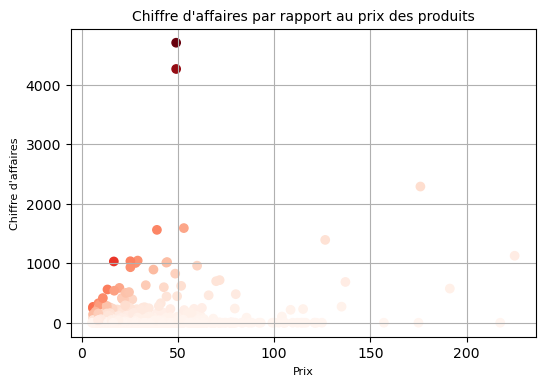

In [75]:
plt.figure(figsize=(6, 4))

plt.scatter(df_global['price'],df_global['chiffre_d\'affaires'], c=df_global['total_sales'], cmap='Reds')
plt.title('Chiffre d\'affaires par rapport au prix des produits', fontsize=10)
plt.xlabel('Prix', fontsize=8)
plt.ylabel('Chiffre d\'affaires', fontsize=8)
plt.grid()
plt.show()

<div style="border: 1px solid RGB(173,40,59);"
     
**OBSERVATIONS :** 
     
- La concentration des ventes se situent sur des produits ayant un prix inférieur à 75 €. 
- Le chiffre d\'affaires des produits les plus vendus ne dépasse pas les 1 000 €. 
- Il y a peu de ventes sur les produits ayant un prix supérieur à 100 €. 
- Les chiffres d\'affaires les plus élevés concernent des produits d\'un prix de 50 €. 


**VISUALISATION DU TOP 10 DES PRODUITS (CA)**

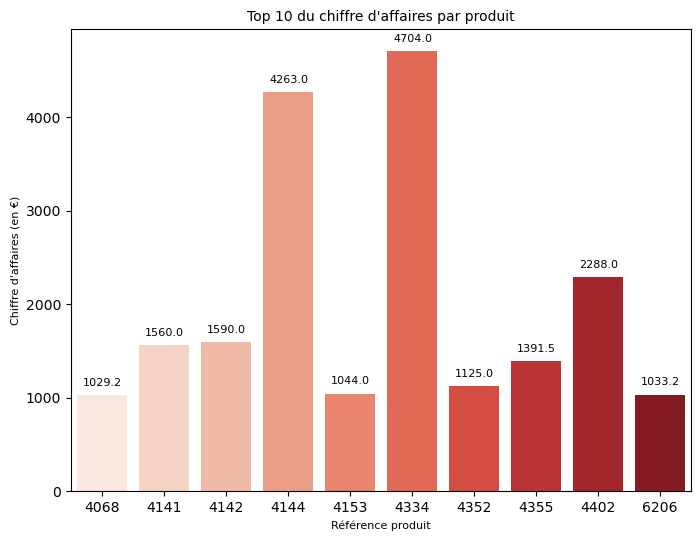

In [76]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_10_ca, x='product_id', y='chiffre_d\'affaires', palette='Reds')
plt.title('Top 10 du chiffre d\'affaires par produit', fontsize=10)
plt.ylabel('Chiffre d\'affaires (en €)', fontsize=8)
plt.xlabel('Référence produit', fontsize=8)

#Afficher les valeurs au-dessus des barplot
capdt=top_10_ca.sort_values('product_id')
capdt=capdt['chiffre_d\'affaires'].tolist()
for i in range(10):    #itérer 10 fois
    plt.text(i-0.3,capdt[i]+100,capdt[i],fontsize=8)


plt.show()

<div style="border: 1px solid RGB(173,40,59);"
     
**OBSERVATIONS :** 
     
- La concentration des ventes se situent sur des produits ayant un prix inférieur à 75 €. 
- Le chiffre d\'affaires des produits les plus vendus ne dépasse pas les 1 000 €. 
- Il y a peu de ventes sur les produits ayant un prix supérieur à 100 €. 
- Les chiffres d\'affaires les plus élevés concernent des produits d\'un prix de 50 €.

In [77]:
#Top 10 des ventes par produit
top_10_sales = df_global.sort_values('total_sales', ascending = False).head(10)
top_10_sales

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_title,guid,post_type,chiffre_d'affaires
286,4334,1,49.0,0,outofstock,7818,96.0,Champagne Gosset Grand Blanc de Blancs,https://www.bottle-neck.fr/?post_type=product&#038;p=7818,product,4704.0
162,4144,1,49.0,11,instock,1662,87.0,Champagne Gosset Grand Rosé,https://www.bottle-neck.fr/?post_type=product&#038;p=1662,product,4263.0
121,4068,1,16.6,157,instock,16416,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,https://www.bottle-neck.fr/?post_type=product&#038;p=16416,product,1029.2
210,4200,1,5.8,190,instock,16295,46.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Rosé 2019,https://www.bottle-neck.fr/?post_type=product&#038;p=16295,product,266.8
188,4172,1,5.7,167,instock,16210,43.0,Maurel Pays d'Oc Chardonnay 2019,https://www.bottle-neck.fr/?post_type=product&#038;p=16210,product,245.1
200,4187,1,13.3,90,instock,16189,42.0,Le Pas de l'Escalette Languedoc Les Petits Pas 2019,https://www.bottle-neck.fr/?post_type=product&#038;p=16189,product,558.6
761,6206,1,25.2,120,instock,16580,41.0,Domaine Giudicelli Patrimonio Blanc 2019,https://www.bottle-neck.fr/?post_type=product&#038;p=16580,product,1033.2
160,4141,1,39.0,1,instock,304,40.0,Champagne Gosset Grande Réserve,https://www.bottle-neck.fr/?post_type=product&#038;p=304,product,1560.0
734,6047,1,10.9,46,instock,16264,38.0,Château de La Liquière Faugères L'Ampoule 2019,https://www.bottle-neck.fr/?post_type=product&#038;p=16264,product,414.2
418,4729,1,8.6,151,instock,38,38.0,Emile Boeckel Crémant Brut Blanc de Blancs,https://www.bottle-neck.fr/?post_type=product&#038;p=38,product,326.8


**VISUALISATION DU TOP 10 DES VENTES PAR PRODUIT**

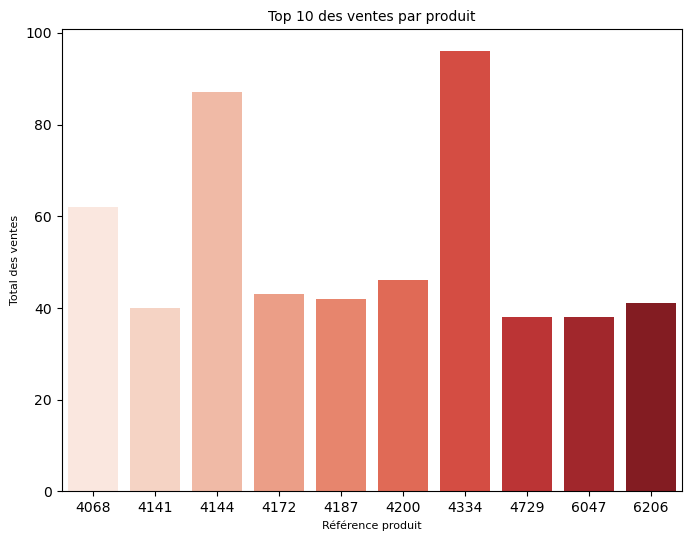

In [78]:
plt.figure(figsize = (8,6))
sns.barplot(data = top_10_sales, x='product_id', y='total_sales', palette='Reds')
plt.title('Top 10 des ventes par produit', fontsize = 10)
plt.ylabel('Total des ventes', fontsize = 8)
plt.xlabel('Référence produit', fontsize = 8)

plt.show()

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
4.1.2 CA total réalisé en ligne <a class='anchor' id='4.1.2-ca-total-réalise-en-ligne'></a> </h3>

In [79]:
ca_total = df_global['chiffre_d\'affaires'].sum()
print('Le chiffre d\'affaires total réalisé en ligne est de', '{:,}'.format(int(ca_total)).replace(',', ' '), 'euros.')


Le chiffre d'affaires total réalisé en ligne est de 70 568 euros.


## 
<h2 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
4.2  Analyse des erreurs de saisie des prix <a class='anchor' id='4.2-analyse-des-erreurs-de-saisie-des-prix'></a> </h2>

Nous allons à présent analyser si le dataframe global contient des anomalies. 

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
4.2.1 Description du df global <a class='anchor' id='4.2.1-description-du-df-global'></a> </h3>

In [80]:
df_global.describe()

,product_id,onsale_web,price,stock_quantity,total_sales,chiffre_d'affaires
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000
mean,5032.557423,1.0,32.493137,28.761905,4.012605,98.835574
std,790.510878,0.0,27.810525,48.005486,8.518183,307.685071
min,3847.000000,1.0,5.200000,-1.000000,0.000000,0.000000
25%,4280.250000,1.0,14.100000,2.000000,0.000000,0.000000
50%,4796.000000,1.0,23.550000,12.000000,1.000000,15.250000
75%,5710.500000,1.0,42.175000,35.000000,4.000000,91.150000
max,7338.000000,1.0,225.000000,578.000000,96.000000,4704.000000


<div style="border: 1px solid RGB(173,40,59);"
     
**OBSERVATIONS VENTES :** 
     
**Price** : 
- 75% des prix sont inférieurs à 42 €.  

**Total_sales**
- 75% du nombre des ventes d\'un produit sont inférieurs à 4 ventes. 
- Le nombre de ventes d\'un produit est compris entre 0 et 96 ventes. 
                         
**Chiffre_d\'affaires**                         
- 75% du CA par produit est inférieure à 91,15 €. 
- Le CA par produit est compris entre 0 et 4704 €. 
                                                                                                                

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
4.2.2 Les outliers potentiels <a class='anchor' id='4.2.2-les-outliers-potentiels'></a> </h3>

À présent, nous allons vérifier s'il y a des erreurs de saisie de prix pour certains produits. 

Pour cela, nous allons réaliser une analyse sur la variable 'price' afin de détecter d'éventuelle valeurs aberrantes (outliers) et de les lister. 

Nous allons également les représenter graphiquement pour plus de lisibilité. 

####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
a. Méthode écart interquartile <a class='anchor' id='a.-methode-ecart-interquartile'></a> </h4>

Si certaines valeurs de 'price' sont au-dessous de Q1 - 1,5IQ ou au-dessus de Q3 + 1,5IQ, alors elles sont considérées comme outliers. 

Donc nous devons calculer l'écart interquartile (IQ). 

**IQ = Q3 - Q1**

In [81]:
df_global['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

**Q1** : 1/4 des valeurs se trouvent en dessous  et 3/4 au-dessus

**Med** : la moitié des valeurs se trouvent en dessous et l'autre moitié au-dessus

**Q3** : 3/4 se trouvent en dessous et 1/4 au-dessus

In [82]:
#Calcul de l'écart interquartile 
q1 = 14.10
q3 = 42.17
iq = q3 - q1
print('L\'écart interquartile est de', iq, '.')

L'écart interquartile est de 28.07 .


In [83]:
#Calcul de la valeur minimale et la valeur maximale 
val_min = q1 - (1.5 * iq)
val_max = q3 + (1.5 * iq)
print('Les prix sont considérés comme outliers ceux étant en dessous de la valeur minimale de', round(val_min,2), '€, et ceux au-dessus de la valeur maximale de', round(val_max,2), '€.')

Les prix sont considérés comme outliers ceux étant en dessous de la valeur minimale de -28.01 €, et ceux au-dessus de la valeur maximale de 84.28 €.


####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
b. Première visualisation graphique des potentiels outliers <a class='anchor' id='b.-premiere-visualisation-graphique-des-potentiels-outliers'></a> </h4>

Les outliers peuvent être soit :
- des valeurs aberrantes et donc des valeurs fausses
- des valeurs atypiques c'est-à-dire qui sortent du lot mais ne sont pas forcément fausses

Nous pouvons les déterminer car ce sont des valeurs trop importantes ou trop faibles par rapport à l'ensemble des valeurs de 'price'. 

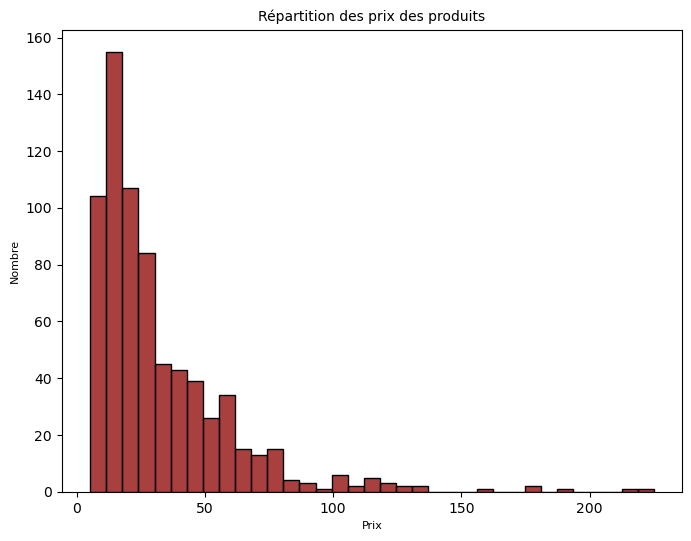

In [84]:
#Création d'un histogramme pour visualisation la répartition des prix
plt.figure(figsize = (8,6))
sns.histplot(data = df_global, x='price', color='darkred')
plt.title('Répartition des prix des produits', fontsize = 10)
plt.ylabel('Nombre', fontsize = 8)
plt.xlabel('Prix', fontsize = 8)

plt.show()

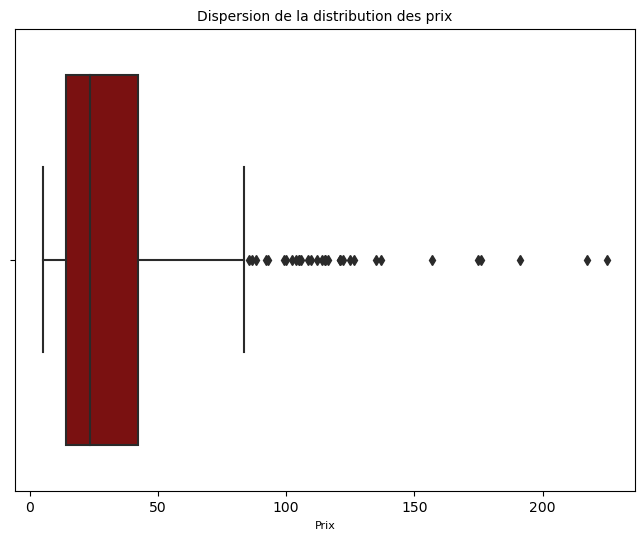

In [85]:
#Création d'un boxplot pour visualiser la dispersion de cette distribution
plt.figure(figsize = (8,6))
sns.boxplot(data = df_global, x='price', color='darkred')
plt.title('Dispersion de la distribution des prix', fontsize = 10)
plt.xlabel('Prix', fontsize = 8)

plt.show()

<div style="border: 1px solid RGB(173,40,59);"
     
**REMARQUE :** 
     
- On peut observer plusieurs outliers.
- Les 2 graphiques se rejoignent et se concordent. 
- Une grande partie des valeurs est proche de la médiane
- Il y a un grand écart entre la médiane et la valeur maximale contrairement à celui avec la valeur minimale

####
<h4 style="margin: auto; padding: 20px; color: RGB(29,29,27); ">
c. Liste des outliers potentiels <a class='anchor' id='c.-liste-des-outliers-potentiels'></a> </h4>

In [86]:
#Afficher le nombre de outliers
price_outlier = df_global[(df_global['price'] < val_min) | (df_global['price'] > val_max)]
nb_outlier = len(price_outlier)
print(f"{nb_outlier} potentiels outliers ont été relevés.")

32 potentiels outliers ont été relevés.


In [87]:
#Afficher la liste des produits concernés avec seulement les variables qui nous intéressent
price_outlier[['product_id', 'price', 'sku', 'post_title']].sort_values('price')

,product_id,price,sku,post_title
297,4359,85.6,13853,Champagne Larmandier-Bernier Grand Cru Les Chemins d'Avize 2011
539,5026,86.8,13913,Champagne Agrapart &amp; Fils Minéral Extra Brut Blanc de Blancs Grand Cru 2012
156,4132,88.4,11668,Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012
605,5565,92.0,19822,Tempier Bandol Cabassaou 2017
707,5916,93.0,14774,Wemyss Malts Single Cask Scotch Whisky Chocolate Moka Cake 2005 Strathclyde
765,6214,99.0,11601,Domaine des Comtes Lafon Volnay 1er Cru Champans 2013
154,4115,100.0,15382,Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017
477,4903,102.3,14805,Domaine Des Croix Corton Grand Cru Les Grèves 2017
314,4407,104.0,3509,Cognac Frapin Cigar Blend
531,5008,105.0,11602,Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2013


###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
4.2.3 Représentation graphique <a class='anchor' id='4.2.3-representation-graphique'></a> </h3>

**Visualisation graphique des outliers**

In [88]:
#Création d'un df qui répertorie seulement les produits ayant des prix normaux 
price_ok = df_global[(df_global['price'] > val_min) | (df_global['price'] < val_max)]

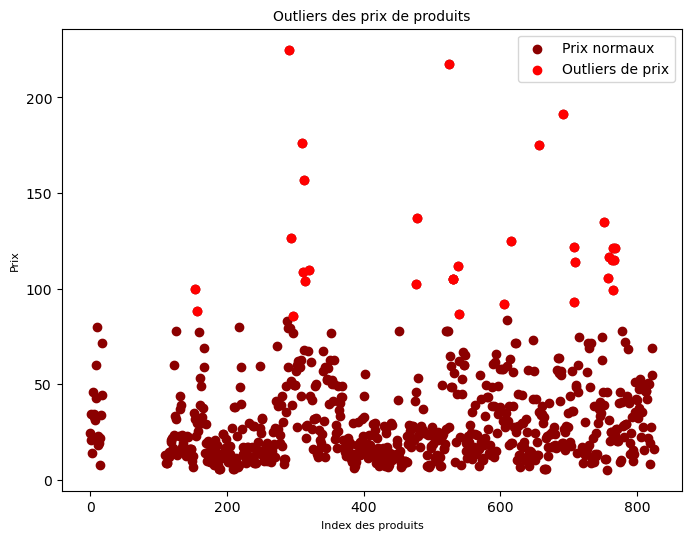

In [89]:
#Représentation nuage de points 
plt.figure(figsize = (8,6))
ok = plt.scatter(price_ok['price'].index, price_ok['price'].values, c='darkred')
outlier = plt.scatter(price_outlier['price'].index, price_outlier['price'].values, c='red')
plt.title('Outliers des prix de produits', fontsize = 10)
plt.xlabel('Index des produits', fontsize = 8)
plt.ylabel('Prix', fontsize = 8)
plt.legend([ok, outlier], ['Prix normaux', 'Outliers de prix'])
plt.show()

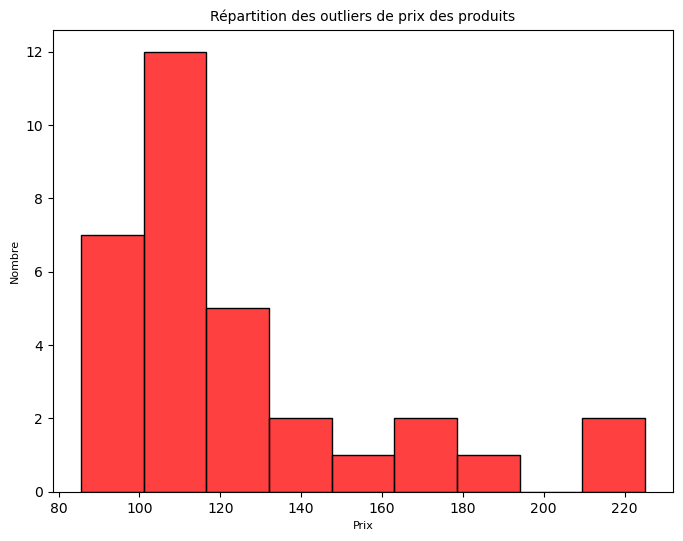

In [90]:
plt.figure(figsize = (8,6))
sns.histplot(data = price_outlier, x='price', color='red')
plt.title('Répartition des outliers de prix des produits', fontsize = 10)
plt.ylabel('Nombre', fontsize = 8)
plt.xlabel('Prix', fontsize = 8)

plt.show()

###
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
4.2.4 Analyse des outliers <a class='anchor' id='4.2.4-analyse-des-outliers'></a> </h3>

Bottleneck est une entreprise de vin très prestigieux. 

Il n'est pas impossible que les outliers ne soient pas des valeurs aberrantes mais plutôt des vins relativement coûteux par rapport à la majorité de ces produits. L'entreprise peut posséder quelques vins luxueux.

Pour cela, nous pouvons vérifier les prix des produits chez la concurrence afin de voir si les prix de ces vins sont réellement aberrants ou normaux. 

In [91]:
#Afficher la liste des produits concernés avec seulement les variables qui nous intéressent
price_outlier[['product_id', 'price', 'sku', 'post_title']].sort_values('price')

,product_id,price,sku,post_title
297,4359,85.6,13853,Champagne Larmandier-Bernier Grand Cru Les Chemins d'Avize 2011
539,5026,86.8,13913,Champagne Agrapart &amp; Fils Minéral Extra Brut Blanc de Blancs Grand Cru 2012
156,4132,88.4,11668,Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012
605,5565,92.0,19822,Tempier Bandol Cabassaou 2017
707,5916,93.0,14774,Wemyss Malts Single Cask Scotch Whisky Chocolate Moka Cake 2005 Strathclyde
765,6214,99.0,11601,Domaine des Comtes Lafon Volnay 1er Cru Champans 2013
154,4115,100.0,15382,Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017
477,4903,102.3,14805,Domaine Des Croix Corton Grand Cru Les Grèves 2017
314,4407,104.0,3509,Cognac Frapin Cigar Blend
531,5008,105.0,11602,Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2013


**Comparaison avec la concurrence**

- Domaine des Comtes Lafon Volnay : 7  -> fourchette (130 € - 160 €) - **pas un outlier**
- Zind-Humbrecht : 2  -> 100 € - **pas un outlier**
- Champagne Agrapart & amp : 2  -> fourchette (95 € - 115 €) - **pas un outlier**
- Champagne Larmandier-Bernier : 1  -> 120 €  - **pas un outlier**
- Tempier Bandol : 1  -> 115 € - **pas un outlier**
- Wemyss Malts Single : 3  -> fourchette (99 € - 120 €) - **pas un outlier**
- Domaine des Croix Corton : 3  -> fourchette (90 € - 133€) - **pas un outlier**
- Cognac Frapin : 3  -> fourchette (120 € - 210 €) - **pas un outlier**
- David Duband : 2  -> fourchette (109 € - 217,5 €) - **pas un outlier**
- Château de Meursault : 1  -> 127 € - **pas un outlier**
- Domaine Clerget : 1  -> 143 € - **pas un outlier**
- Domaine Weinbach Gewurztraminer : 1  -> 124,8 € - **pas un outlier**
- Egly-Ouriet : 3  -> fourchette (195 € - 380 €) - **pas un outlier**
- Champagne Gosset : 1  -> fourchette (115 € - 195 €) - **pas un outlier**
- Camille Giroud : 1  ->  180 € - **pas un outlier**

# <div style="border: 1px solid RGB(173,40,59);" >
<h1 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">
V. Conclusion <a class='anchor' id='V.-conclusion'></a> </h1>

Ces 32 produits relevés comme potentiels outliers ne constituent pas des valeurs aberrantes. 

Après comparaison avec la concurrence, il semble que les prix appliqués soient normaux car il s'agit de vins plus prestigieux que la plupart vendue par Bottleneck. 